# Spline Regression

For the exercises, we will continue with the same data as in the previous sections. Again, we want to predict `wage` from `age` in the Mid-Atlantic Wage Dataset.

In [1]:
# Uncomment the following line when working in Colab
# !pip install ISLP  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
from ISLP import load_data

df = load_data('Wage')
print(df.head())

   year  age            maritl      race        education              region  \
0  2006   18  1. Never Married  1. White     1. < HS Grad  2. Middle Atlantic   
1  2004   24  1. Never Married  1. White  4. College Grad  2. Middle Atlantic   
2  2003   45        2. Married  1. White  3. Some College  2. Middle Atlantic   
3  2003   43        2. Married  3. Asian  4. College Grad  2. Middle Atlantic   
4  2005   50       4. Divorced  1. White       2. HS Grad  2. Middle Atlantic   

         jobclass          health health_ins   logwage        wage  
0   1. Industrial       1. <=Good      2. No  4.318063   75.043154  
1  2. Information  2. >=Very Good      2. No  4.255273   70.476020  
2   1. Industrial       1. <=Good     1. Yes  4.875061  130.982177  
3  2. Information  2. >=Very Good     1. Yes  5.041393  154.685293  
4  2. Information       1. <=Good     1. Yes  4.318063   75.043154  


## Exercise 1: Custom cut points

- Create a regression model to predict `wage` from `age` by using stepwise functions. However, instead of separating the data into 4 evenly sized bins, this time create custom cut points at age 30, 40, 50, 60, and 70. 
- Print and interpret the model summary
- Plot the model

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     44.90
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           7.91e-45
Time:                        11:38:41   Log-Likelihood:                -15341.
No. Observations:                3000   AIC:                         3.069e+04
Df Residuals:                    2994   BIC:                         3.073e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

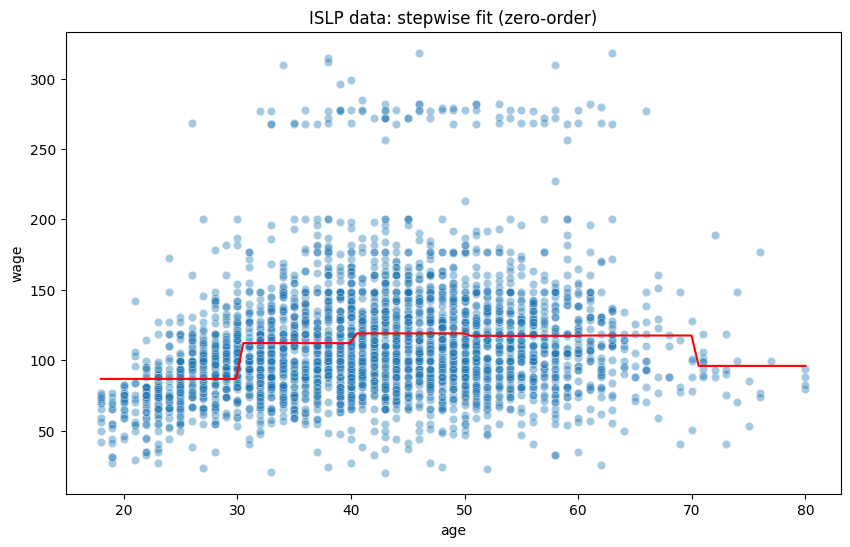

In [2]:
# Fit the model with custom knots
transformed_age = patsy.dmatrix("bs(age, knots=(30,40,50,60,70), degree=0)",
                                data={"age": df['age']},
                                return_type='dataframe')

model = sm.OLS(df['wage'], transformed_age)
model_fit = model.fit()

print(model_fit.summary())

# Plot the model
plt.figure(figsize=(10, 6))
xp = np.linspace(df['age'].min(), df['age'].max(), 100)
xp_trans = patsy.dmatrix("bs(xp, knots=(30,40,50,60,70), degree=0)",
                         data={"xp": xp},
                         return_type='dataframe')

predictions = model_fit.predict(xp_trans)

sns.scatterplot(data=df, x="age", y="wage", alpha=0.4)
plt.plot(xp, predictions, color='red')
plt.title("ISLP data: stepwise fit (zero-order)");

## Exercise 2: Higher-order splines

1. Please fit and plot a second-order spline regression model with cut points at age 30, 50, and 70
2. Please fit and plot a third-order spline regression model with cut points at age 30, 50, and 70. Discuss the differences between the models. Does the third-order term significantly improve the model?

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     56.07
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           7.09e-56
Time:                        11:38:42   Log-Likelihood:                -15316.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2994   BIC:                         3.068e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

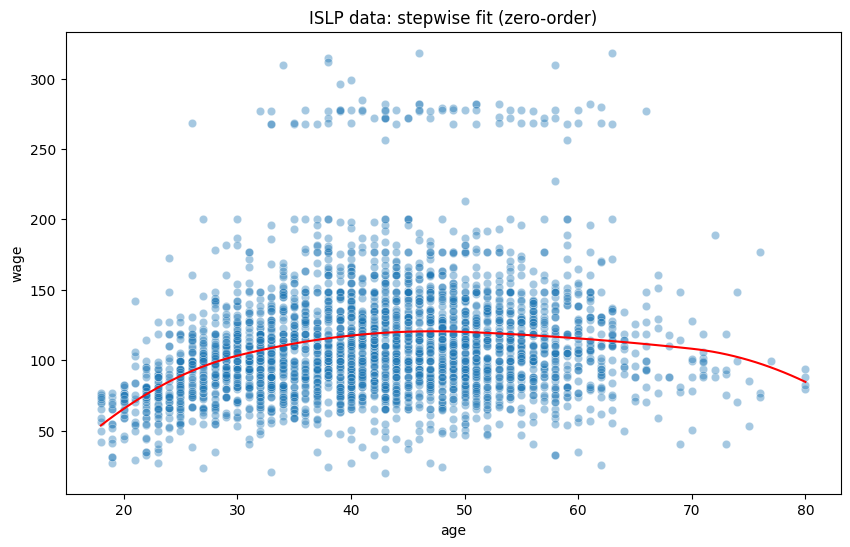

In [3]:
# Fit the model with custom knots
transformed_age = patsy.dmatrix("bs(age, knots=(30,50,70), degree=2)",
                                data={"age": df['age']},
                                return_type='dataframe')

model = sm.OLS(df['wage'], transformed_age)
model_fit = model.fit()

print(model_fit.summary())

# Plot the model
plt.figure(figsize=(10, 6))
xp = np.linspace(df['age'].min(), df['age'].max(), 100)
xp_trans = patsy.dmatrix("bs(xp, knots=(30,50,70), degree=2)",
                         data={"xp": xp},
                         return_type='dataframe')

predictions = model_fit.predict(xp_trans)

sns.scatterplot(data=df, x="age", y="wage", alpha=0.4)
plt.plot(xp, predictions, color='red')
plt.title("ISLP data: stepwise fit (zero-order)");

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     47.77
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           3.20e-56
Time:                        11:38:42   Log-Likelihood:                -15313.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2993   BIC:                         3.068e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

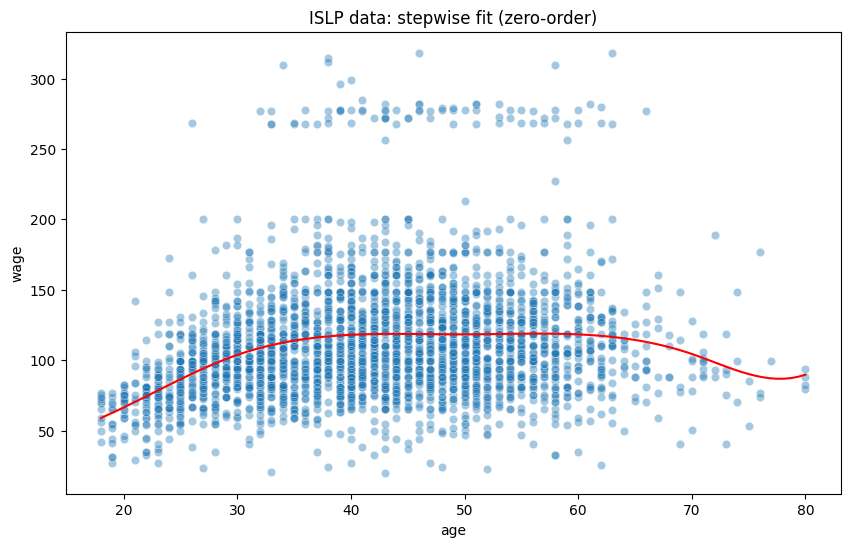

In [4]:
# Fit the model with custom knots
transformed_age = patsy.dmatrix("bs(age, knots=(30,50,70), degree=3)",
                                data={"age": df['age']},
                                return_type='dataframe')

model = sm.OLS(df['wage'], transformed_age)
model_fit = model.fit()

print(model_fit.summary())

# Plot the model
plt.figure(figsize=(10, 6))
xp = np.linspace(df['age'].min(), df['age'].max(), 100)
xp_trans = patsy.dmatrix("bs(xp, knots=(30,50,70), degree=3)",
                         data={"xp": xp},
                         return_type='dataframe')

predictions = model_fit.predict(xp_trans)

sns.scatterplot(data=df, x="age", y="wage", alpha=0.4)
plt.plot(xp, predictions, color='red')
plt.title("ISLP data: stepwise fit (zero-order)");

## Voluntary exercise 1: Choosing best model

Now that we fitted multple models, one question remains: Which one do we choose? To decide on that we will use the `AIC` (note that there are also other measures). Feel free to use whatever cut points you like.

*Hints: Try using a loop to achieve this!*
- *You can create a list of formulas ( e.g., `bs(age, knots=(20,40,60,80), degree=0)`, `bs(age, knots=(20,40,60,80), degree=1)`, ...) and iterate over them.*
- *You can use the `.aic` attribute of a fitted model to extract the AIC.*

In [5]:
formulas = ["bs(age, knots=(20,40,60,80), degree=0)",
            "bs(age, knots=(20,40,60,80), degree=1)",
            "bs(age, knots=(20,40,60,80), degree=2)",
            "bs(age, knots=(20,40,60,80), degree=3)"]

for i, formula in enumerate(formulas):
    age_trans = patsy.dmatrix(formula,
                                    data={"age": df['age']},
                                    return_type='dataframe')

    print(f"AIC for order {i}:", sm.OLS(df['wage'], age_trans).fit().aic)

AIC for order 0: 30780.420430468923
AIC for order 1: 30647.79526788359
AIC for order 2: 30638.84928413812
AIC for order 3: 30642.64575737064


## Voluntary exercise 2: Dynamic plotting

You might have noticed that sometimes it is hard to see the cutpoints, especially when two bins share very similar estimates (see ). Therefore, it makes sense to highlight the cut points somehow when plotting the models. 

- Grab a model of your choice and modify the code so that the cut points are marked by black, dashed, vertical lines. 
- Try to make your code dynamic, meaning it dynamically accepts cut points provided in the `cut_points` list and automatically fits and plots the model accordingly.
- Add a legend to the plot and label all lines and and data.

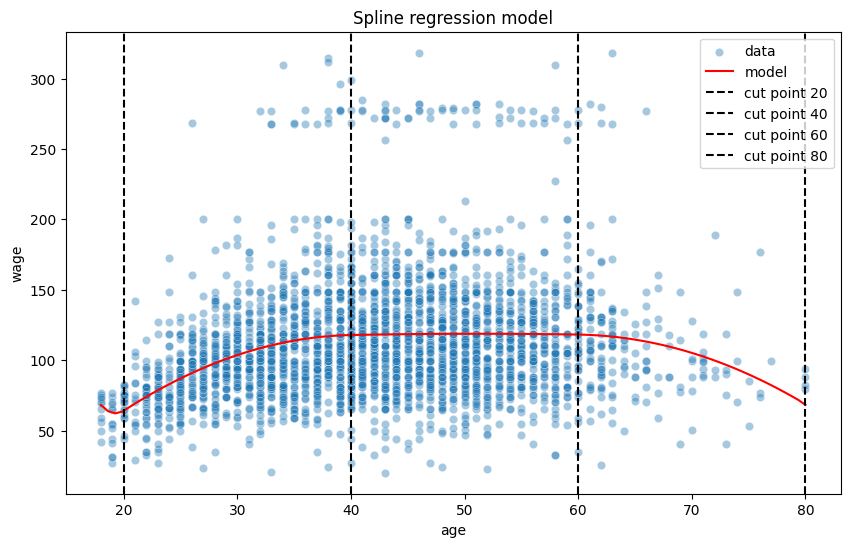

In [6]:
cut_points = (20,40,60,80)

# Fit the model with custom knots
transformed_age = patsy.dmatrix(f"bs(age, knots={str(cut_points)}, degree=2)",
                                data={"age": df['age']},
                                return_type='dataframe')

model = sm.OLS(df['wage'], transformed_age)
model_fit = model.fit()

# Plot the model
plt.figure(figsize=(10, 6))
xp = np.linspace(df['age'].min(), df['age'].max(), 100)
xp_trans = patsy.dmatrix("bs(xp, knots=(20,40,60,80), degree=2)",
                         data={"xp": xp},
                         return_type='dataframe')

predictions = model_fit.predict(xp_trans)

sns.scatterplot(data=df, x="age", y="wage", alpha=0.4, label="data")
plt.plot(xp, predictions, color='red', label="model")
plt.title("Spline regression model");

for cut in cut_points:
    plt.axvline(cut, color='black', linestyle='--', label=f"cut point {cut}")

plt.legend();